## LAB 2 - TASK 2 submission. ML 2023-24.


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**: ....


### FILL UP THIS BRIEF DESCRIPTION of your TOY DATASET:

* Number of Classes: ... (typically this will be 5)
* Name of the classes: ...
* Source of the classes: ... (e.g., URL of original dataset)


## 2. Training from scratch

In this exercise we are building a small conv net to train from scratch using Tensorflow.Keras APIs

## Get data and tensorflow imports ready

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

In [10]:
# GET YOUR IMAGES READY

# OPTION A: upload and unzip, untar ... images if necessary (not recommended ... it'll only last one session)
#!tar -xvzf images.tar.gz
# !unzip data.zip
# !ls

# OPTION B: mount your google drive to point the code to find the data in your drive folders
# (instructions here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA)

data_dir = '/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab4/data/mini-mini-flowers' # Update this path to point to your data directory


In [11]:
# SOME HELPER FUNCTIONS TO VISUALIZE RESULTS
def vis_history(results_history):
    acc = results_history.history['accuracy']
    val_acc = results_history.history['val_accuracy']

    loss = results_history.history['loss']
    val_loss = results_history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Definning and training the CNN
You need to train 3 versions of this model:
* First run and train the model given here by default.
* Then evaluate what happens if you remove Dropout layer and train again.
* Then add code to incorporate image augmentation to the network training.

Use this example to see how to easily add data augmentation as an additional layer to your model. https://www.tensorflow.org/tutorials/images/classification#data_augmentation

Think what data augmentation could be interesting for your classes and program the layer to get it.

In [ ]:
import keras

####### ***** TO-DO-LAB *****  #######
# make sure you config these params to fit what you want/need

# dimensions of our images.
img_width, img_height = 150, 150
# MODIFY THE PATH TO POINT TO YOUR DATA! locally here or in your mounted drive
# data_dir = 'data/train' # all in one folder and let the system do the split
nb_train_samples = 160 # UPDATE WITH YOUR NUMBERS!!
nb_validation_samples = 40 # UPDATE WITH YOUR NUMBERS!!
epochs = 10 # 50 # UPDATE WITH YOUR NUMBERS!!
batch_size = 4 #16
num_classes = 5
####### ***** TO-DO-LAB *****  #######

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #1
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# for more optimized handling of the data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.save_weights('first_try.weights.h5')

#### *************** TO-DO-LAB *************** ####
# DEFINE a SECOND MODEL that does NOT INCLUDE DROPOUT, compile it and train it
model2 = ...
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model2.save_weights('first_try.weights_model2.h5')

#
# DEFINE a BETTER MODEL that INCLUDES DROPOUT AND AUGMENTATION, compile it and train it
# model3 = ...

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model3 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model3.summary()

history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model3.save_weights('first_try.weights_model3.h5')


#### *************** END TO-DO-LAB *************** ####



Found 200 files belonging to 5 classes.
Using 160 files for training.
Found 200 files belonging to 5 classes.
Using 40 files for validation.
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_30 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 conv2d_90 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_90 (MaxPooli  (None, 75, 75, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                      

2024-11-13 17:44:23.484455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 21ms/step - loss: 1.6162 - accuracy: 0.3125 - val_loss: 0.9320 - val_accuracy: 0.5000
Epoch 2/10
 1/40 [..............................] - ETA: 0s - loss: 1.0789 - accuracy: 0.5000

2024-11-13 17:44:24.615589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 17ms/step - loss: 1.1841 - accuracy: 0.4313 - val_loss: 0.8692 - val_accuracy: 0.5250
Epoch 3/10
40/40 [==============================] - 1s 15ms/step - loss: 0.9625 - accuracy: 0.6187 - val_loss: 0.7264 - val_accuracy: 0.7250
Epoch 4/10
40/40 [==============================] - 1s 14ms/step - loss: 0.7070 - accuracy: 0.7500 - val_loss: 1.1395 - val_accuracy: 0.7000
Epoch 5/10
40/40 [==============================] - 1s 14ms/step - loss: 0.3735 - accuracy: 0.8813 - val_loss: 0.9017 - val_accuracy: 0.7000
Epoch 6/10
40/40 [==============================] - 1s 14ms/step - loss: 0.2522 - accuracy: 0.9000 - val_loss: 0.7679 - val_accuracy: 0.7500
Epoch 7/10
40/40 [==============================] - 1s 14ms/step - loss: 0.1328 - accuracy: 0.9500 - val_loss: 0.8591 - val_accuracy: 0.7000
Epoch 8/10
40/40 [==============================] - 1s 14ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.1774 - val_accuracy: 0.7000
Epoch 9/10
40/40 [======

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# print()


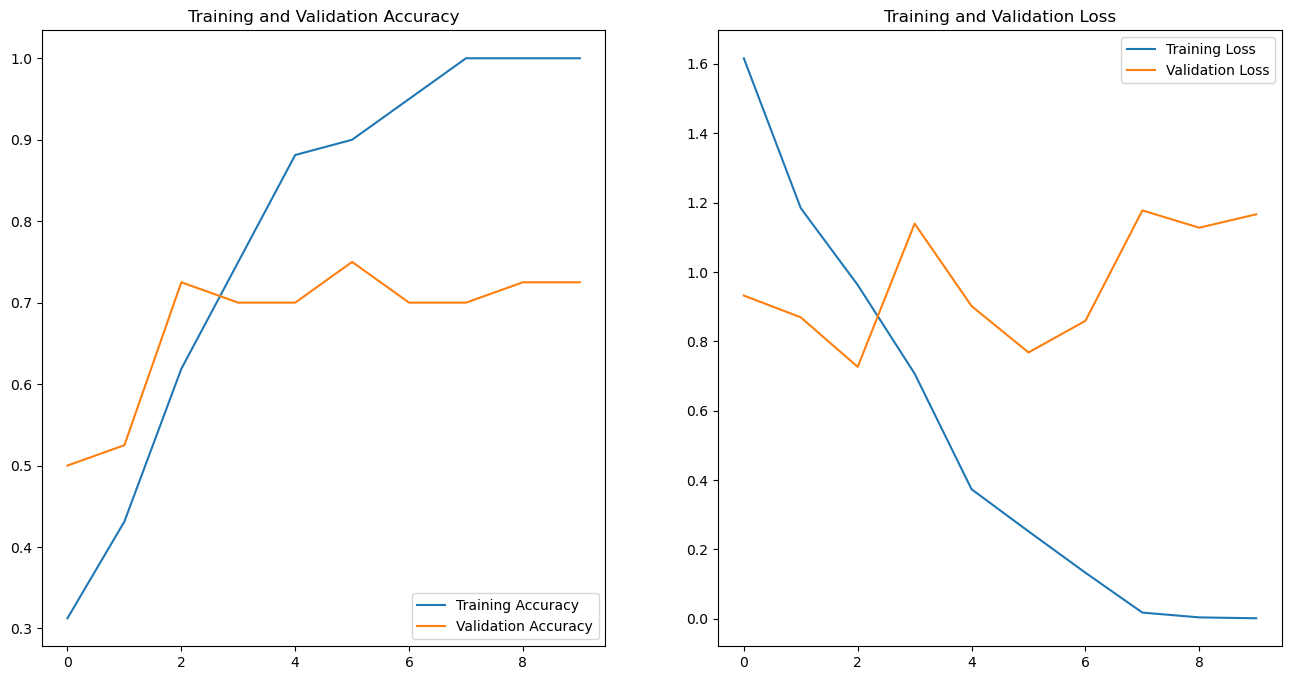

In [43]:
# VISUALIZE INITIAL RESULTS
vis_history(history)

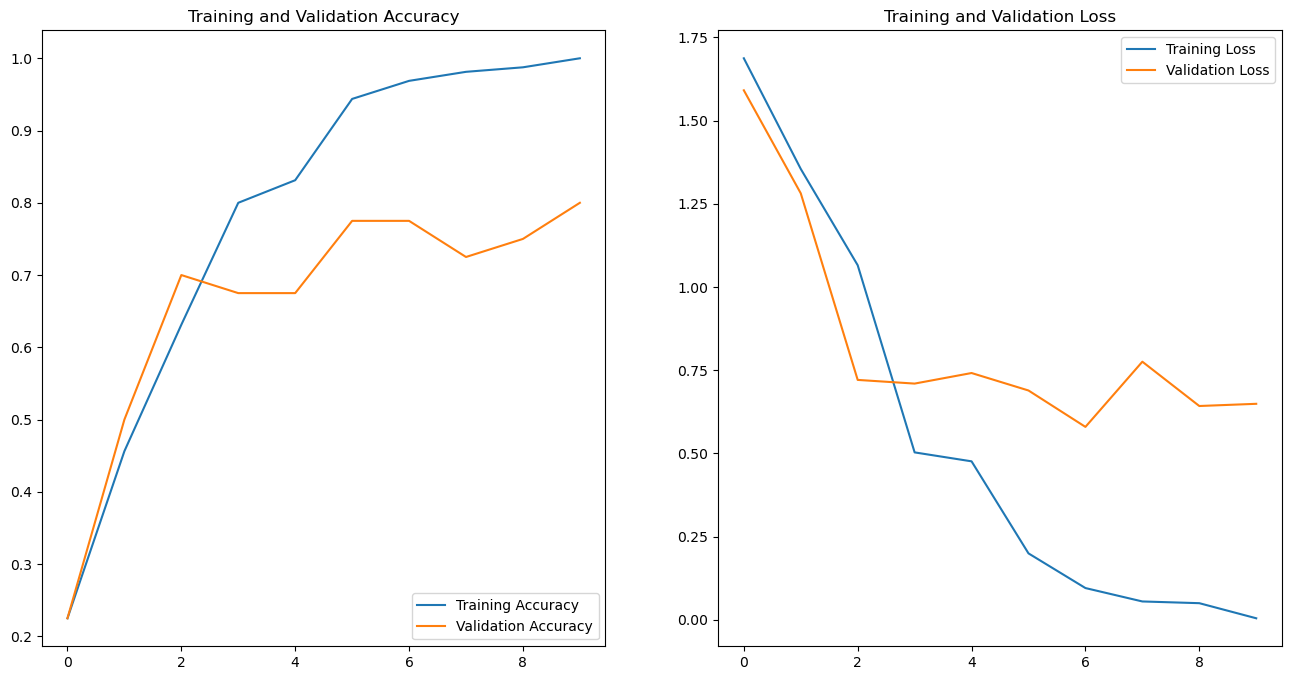

In [29]:
# PLOT HERE YOUR RESULTS WITHOUT DROPOUT
vis_history(history2)

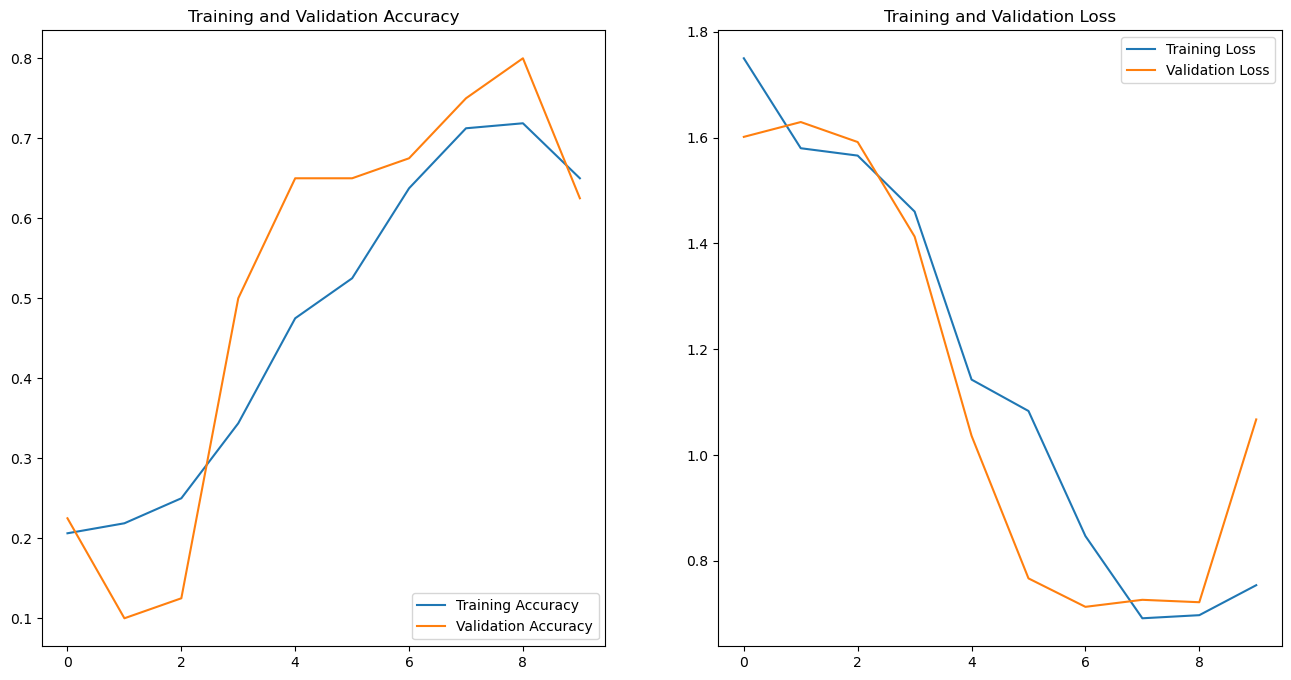

In [30]:
# PLOT HERE YOUR RESULTS INCLUDING DROPOUT and AUGMENTATION
vis_history(history3)

### **QUESTION:** briefly discuss the results of the CNN with the different variations (with/without augmentation, with/without dropout). (maximum of 5 lines)

ANSWER: [PUT-YOUR-ANSWER-HERE]

## Witht vs whithout droput
When applying different values for droput (0.1, 0.2, 0.5) we still see overfitting due to the size of the dataset. Given that our dataset is of 200 images, turning off some neurons is counterproductive. 

## With vs without data augmentation
We saw a big difference when applying a data augmentation technique, for the same reason as previously. Since we have more data, the model could learn more features thanks to a random flip, rotation and zoom. If we could feed the model with much more data, this technique won´t be necessary at some point.
